<a href="https://colab.research.google.com/github/T33mac/colab-projects/blob/master/Multivariate_Comparison_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 756x518.4 with 0 Axes>

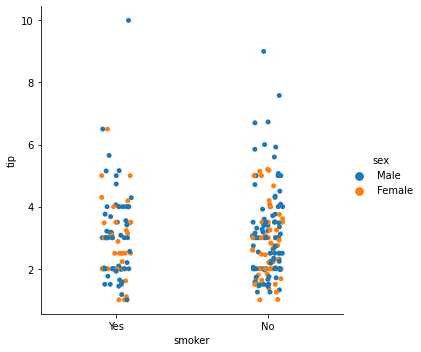

In [0]:
fig = plt.figure(figsize=(10.5, 7.2))
sns.catplot(x='smoker', y='tip', hue='sex', data=tips)

<Figure size 756x518.4 with 0 Axes>

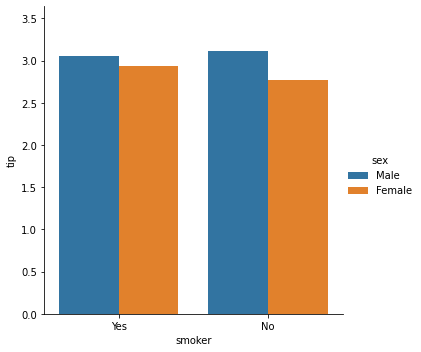

In [0]:
fig = plt.figure(figsize=(10.5, 7.2))
sns.catplot(x='smoker', y='tip', hue='sex', data=tips, kind='bar', errwidth=0) #errwidth shows outlier data?

In [0]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flights = flights.pivot('month', 'year', 'passengers')
flights.head(12)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


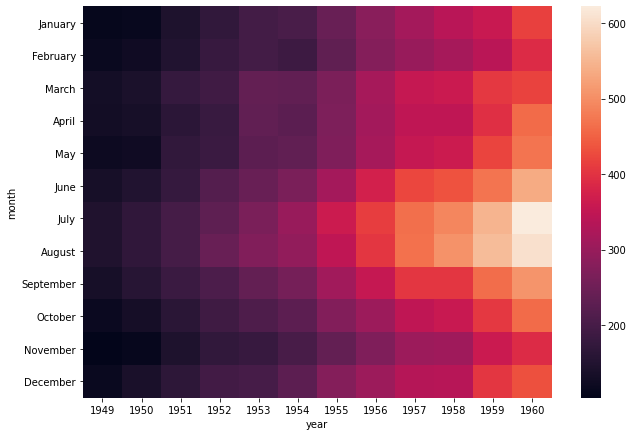

In [0]:
fig = plt.figure(figsize=(10.5,7.2))
sns.heatmap(flights)

In [0]:
!pip install geopandas
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install mapclassify
!pip install geoplot

     |████████████████████████████████| 931kB 3.4MB/s 
     |████████████████████████████████| 14.7MB 277kB/s 
     |████████████████████████████████| 10.4MB 51.6MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 1s (290 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
U

In [0]:
import geopandas 
import geoplot

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.002791
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001503
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.056823


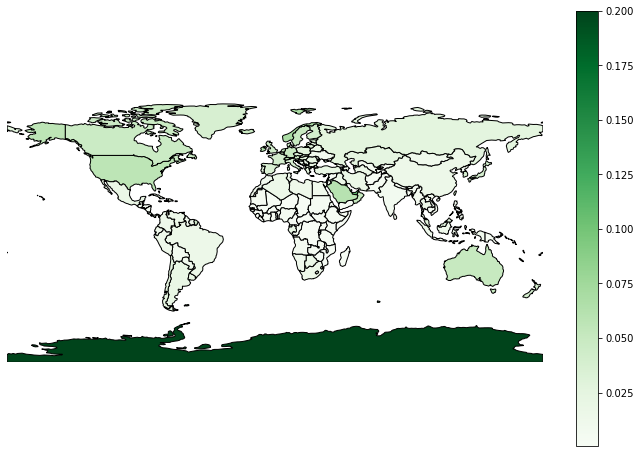

In [0]:
geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(12,8), legend=True)

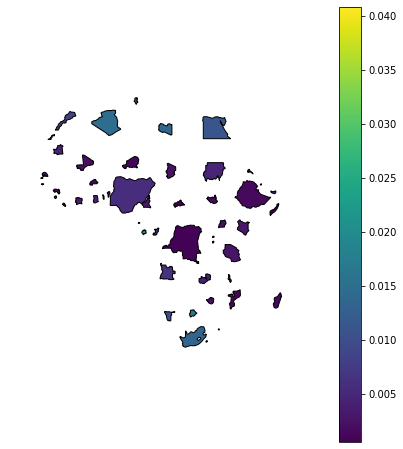

In [0]:
geoplot.cartogram(df[df['continent'] == 'Africa'],
                  scale='pop_est', hue='gdp_pp',
                  limits=(0.2, 1), figsize=(7,8),
                  legend=True, legend_var='hue')